In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def draw_circle(event, x, y, flags, param):
    global img
    if event == cv.EVENT_LBUTTONDOWN:
        bgr = img[x:x+1, y:y+1,:]
        print("BGR:", bgr)
        hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
        print("HSV:", hsv)
        cv.circle(img, (x,y), 5, (0,255,0), +2)
        
img = cv.imread(r"D:\Opencv\class.vision-master\images\PopEffects.jpeg")
cv.namedWindow("image")
cv.setMouseCallback('image', draw_circle)

while 1:
    cv.imshow('image', img)
    if cv.waitKey(1) & 0xff == 27:
        break

cv.destroyAllWindows()

BGR: [[[ 43  34 101]]]
HSV: [[[176 169 101]]]


In [16]:
def pop_effect(image, lower, upper):
    img = image.copy()
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    mask = cv.inRange(hsv, lower, upper)
    mask_inv = cv.bitwise_not(mask)
    
    res = cv.bitwise_and(img, img, mask=mask)
    background = cv.bitwise_and(gray, gray, mask=mask_inv)
    background = cv.merge([background]*3)
    
    return cv.add(res, background)

Text(0.5, 1.0, 'result')

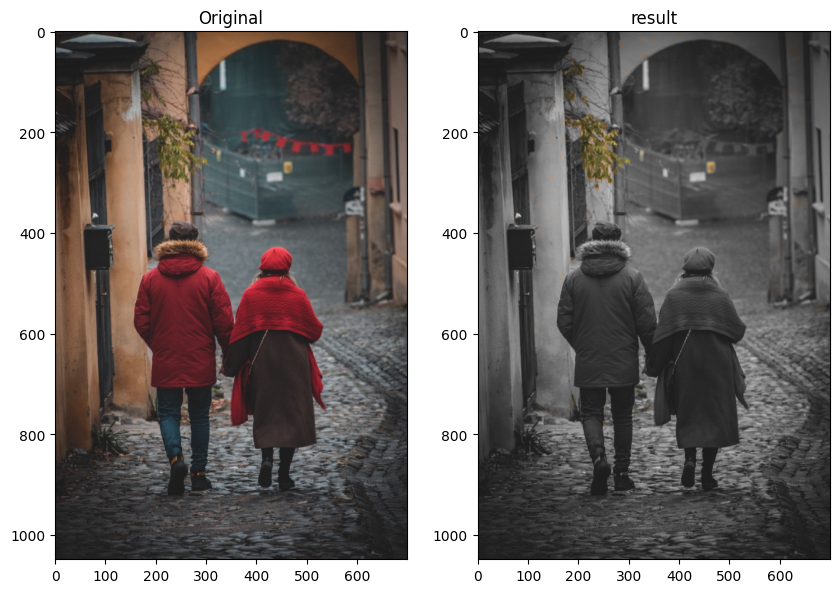

In [18]:
def apply_pop_effect(event, x, y, flags, param, crange=10):
    global image, new_image
    
    if event == cv.EVENT_LBUTTONDOWN:
        hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
        h, s, v = hsv[x,y, :]
        lower_h = max(0, h-crange)
        upper_h = min(179, h+crange)
        
        lower = np.array([lower_h,50,50])
        upper = np.array([upper_h,255,255])
        new_image = pop_effect(image, lower, upper)
        cv.imshow("result", new_image)
        
image = cv.imread(r"D:\Opencv\class.vision-master\images\PopEffects.jpeg")
new_image = image.copy()

cv.namedWindow("image")
cv.setMouseCallback('image', apply_pop_effect)

while True:
    cv.imshow("image", image)
    if cv.waitKey(1) & 0xff == 27:
        break
cv.destroyAllWindows()

plt.figure(figsize=[10,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("result")